In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('bdg.csv')
df.head()

,new ID,formula,bandgap,n,orientation,A'_MPI,A'_AW,A'_V,A'_R,A'_Rb,...,X_EI2,X_EI3,X_Tm,X_Tb,X_EV,X_EM,X_EA,X_R,X_RC,X_IR
0,67,[BrC6H4(CH2)2NH3]2SnI4,2.09,1,1,3.895149,201.08347,198.41065,3.618205,6.839707,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
1,106,[CH3(CH2)3CH(C2H5)CH2NH3]2PbI4,2.38,1,1,3.786246,116.22479,191.61435,3.576412,6.760703,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
2,78,[C5H4NCH2NH3][CH3NH3]Pb2I7,1.88,2,1,4.283260,109.14929,145.52901,3.263032,6.168303,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
3,76,[C5H4NCH2NH3][CH3NH3]2Pb3I10,1.73,3,1,4.283260,109.14929,145.52901,3.263032,6.168303,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
4,77,[C5H4NCH2NH3][CH3NH3]3Pb4I13,1.66,4,1,4.283260,109.14929,145.52901,3.263032,6.168303,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65


In [7]:
X = df.iloc[:,3:]
Y = df.iloc[:,2]

C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


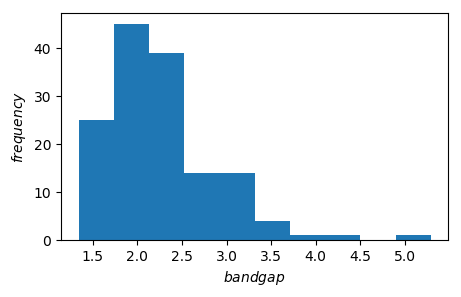

In [9]:
fig = plt.figure(figsize=(5,3),dpi=100)
plt.hist(Y,bins=10)
ax = fig.add_subplot(111)
ax.set_xlabel(r'$bandgap$')
ax.set_ylabel(r'$frequency $')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std) 
X_std.columns = X.columns
X_std.head()

C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,n,orientation,A'_MPI,A'_AW,A'_V,A'_R,A'_Rb,A'_ρ,A'_SA,A'_EN,...,X_EI2,X_EI3,X_Tm,X_Tb,X_EV,X_EM,X_EA,X_R,X_RC,X_IR
0,-0.586339,-0.283524,-0.855858,3.031219,1.759681,1.490668,1.490668,2.930820,1.437527,1.325886,...,-0.627224,-0.597096,0.625793,0.628003,0.617485,0.621612,-0.553789,0.610946,0.624968,0.14909
1,-0.586339,-0.283524,-0.915707,0.653620,1.580768,1.365374,1.365374,-0.821908,1.563382,1.428769,...,-0.627224,-0.597096,0.625793,0.628003,0.617485,0.621612,-0.553789,0.610946,0.624968,0.14909
2,-0.129945,-0.283524,-0.642572,0.455376,0.367566,0.425876,0.425876,0.501016,0.304092,0.343845,...,-0.627224,-0.597096,0.625793,0.628003,0.617485,0.621612,-0.553789,0.610946,0.624968,0.14909
3,0.326448,-0.283524,-0.642572,0.455376,0.367566,0.425876,0.425876,0.501016,0.304092,0.343845,...,-0.627224,-0.597096,0.625793,0.628003,0.617485,0.621612,-0.553789,0.610946,0.624968,0.14909
4,0.782842,-0.283524,-0.642572,0.455376,0.367566,0.425876,0.425876,0.501016,0.304092,0.343845,...,-0.627224,-0.597096,0.625793,0.628003,0.617485,0.621612,-0.553789,0.610946,0.624968,0.14909


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_std,Y,test_size=0.15)

In [13]:
#其中包括neighbor,svm,线性模型，神经网络，普通树模型，集成模型
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_

In [14]:
models=[KNeighborsRegressor(),SVR(),Ridge(),MLPRegressor(alpha=20),DecisionTreeRegressor(),CatBoostRegressor()]
models_name=['KNeighborsRegressor','SVR','Ridge','MLPRegressor','DecisionTree','CatBoostRegressor']

模型： KNeighborsRegressor
训练集相关系数R: 0.8795
训练集均方根误差RMSE: 0.2904
平均绝对误差MAE 0.193
拟合优度r2 0.7677


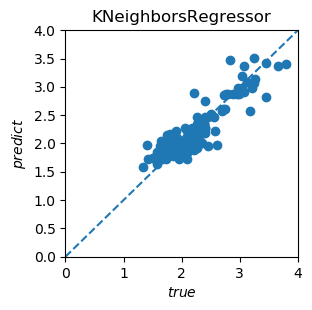

测试集相关系数: 0.9103
测试集均方根误差: 0.2632
平均绝对误差MAE 0.1776
拟合优度r2: 0.8147


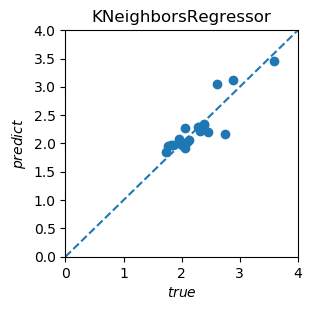

模型： SVR
训练集相关系数R: 0.939
训练集均方根误差RMSE: 0.2157
平均绝对误差MAE 0.1198
拟合优度r2 0.8718


C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


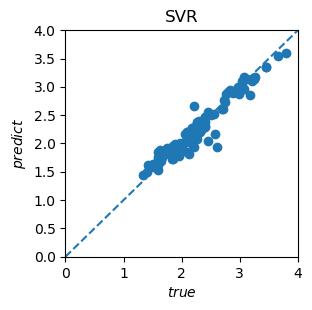

测试集相关系数: 0.8183
测试集均方根误差: 0.3577
平均绝对误差MAE 0.2143
拟合优度r2: 0.6576


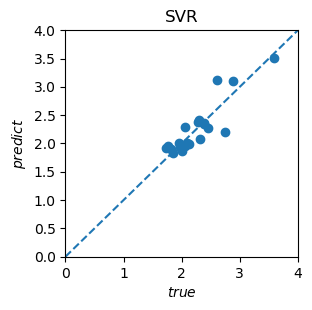

模型： Ridge
训练集相关系数R: 0.9049
训练集均方根误差RMSE: 0.2564
平均绝对误差MAE 0.1736
拟合优度r2 0.8189


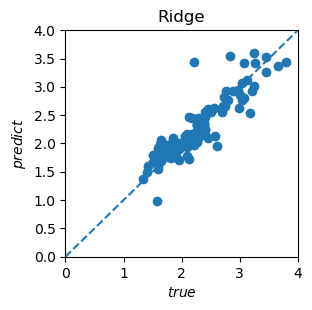

测试集相关系数: 0.9652
测试集均方根误差: 0.1612
平均绝对误差MAE 0.1299
拟合优度r2: 0.9305


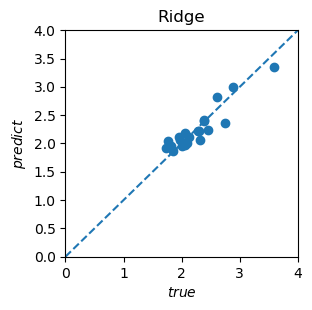

模型： MLPRegressor
训练集相关系数R: 0.926
训练集均方根误差RMSE: 0.2431
平均绝对误差MAE 0.1801
拟合优度r2 0.8372


C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


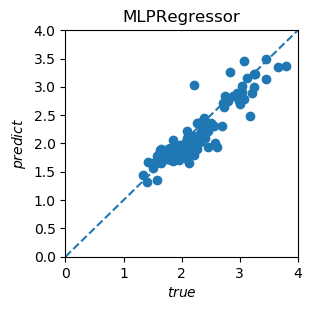

测试集相关系数: 0.9529
测试集均方根误差: 0.1891
平均绝对误差MAE 0.1604
拟合优度r2: 0.9043


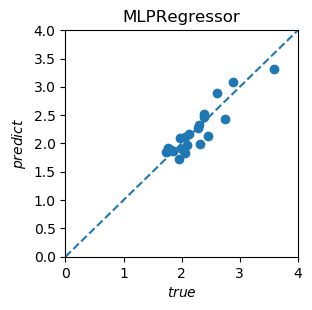

模型： DecisionTree
训练集相关系数R: 0.9966
训练集均方根误差RMSE: 0.0498
平均绝对误差MAE 0.0089
拟合优度r2 0.9932


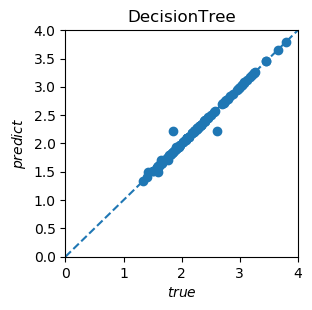

测试集相关系数: 0.9594
测试集均方根误差: 0.2967
平均绝对误差MAE 0.1993
拟合优度r2: 0.7645


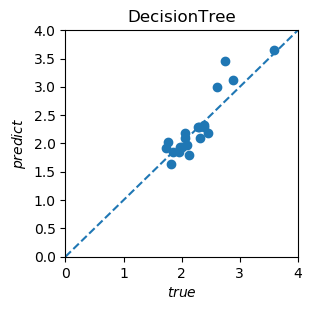

模型： CatBoostRegressor
0:	learn: 2.2792118	total: 17.5ms	remaining: 17.5s
1:	learn: 2.2307281	total: 40.8ms	remaining: 20.4s
2:	learn: 2.1743939	total: 51.9ms	remaining: 17.2s
3:	learn: 2.1186963	total: 61.8ms	remaining: 15.4s
4:	learn: 2.0702136	total: 77.5ms	remaining: 15.4s
5:	learn: 2.0161759	total: 85.9ms	remaining: 14.2s
6:	learn: 1.9699874	total: 100ms	remaining: 14.2s
7:	learn: 1.9247710	total: 115ms	remaining: 14.3s
8:	learn: 1.8849397	total: 136ms	remaining: 15s
9:	learn: 1.8459713	total: 152ms	remaining: 15.1s
10:	learn: 1.8030233	total: 168ms	remaining: 15.1s
11:	learn: 1.7551510	total: 176ms	remaining: 14.5s
12:	learn: 1.7159266	total: 191ms	remaining: 14.5s
13:	learn: 1.6749782	total: 204ms	remaining: 14.4s
14:	learn: 1.6332424	total: 214ms	remaining: 14s
15:	learn: 1.6019146	total: 228ms	remaining: 14s
16:	learn: 1.5610843	total: 238ms	remaining: 13.8s
17:	learn: 1.5205570	total: 249ms	remaining: 13.6s
18:	learn: 1.4836878	total: 267ms	remaining: 13.8s
19:	learn: 1.447696

161:	learn: 0.3229015	total: 2.24s	remaining: 11.6s
162:	learn: 0.3218118	total: 2.25s	remaining: 11.6s
163:	learn: 0.3213168	total: 2.28s	remaining: 11.6s
164:	learn: 0.3202981	total: 2.29s	remaining: 11.6s
165:	learn: 0.3199084	total: 2.3s	remaining: 11.6s
166:	learn: 0.3187265	total: 2.32s	remaining: 11.6s
167:	learn: 0.3179838	total: 2.33s	remaining: 11.5s
168:	learn: 0.3174702	total: 2.35s	remaining: 11.5s
169:	learn: 0.3173052	total: 2.36s	remaining: 11.5s
170:	learn: 0.3170601	total: 2.37s	remaining: 11.5s
171:	learn: 0.3163158	total: 2.39s	remaining: 11.5s
172:	learn: 0.3151976	total: 2.4s	remaining: 11.5s
173:	learn: 0.3144185	total: 2.42s	remaining: 11.5s
174:	learn: 0.3142464	total: 2.44s	remaining: 11.5s
175:	learn: 0.3137272	total: 2.45s	remaining: 11.5s
176:	learn: 0.3136139	total: 2.47s	remaining: 11.5s
177:	learn: 0.3125815	total: 2.48s	remaining: 11.5s
178:	learn: 0.3117635	total: 2.5s	remaining: 11.4s
179:	learn: 0.3109264	total: 2.51s	remaining: 11.4s
180:	learn: 0.3

321:	learn: 0.2587539	total: 4.61s	remaining: 9.71s
322:	learn: 0.2585510	total: 4.63s	remaining: 9.7s
323:	learn: 0.2584827	total: 4.64s	remaining: 9.69s
324:	learn: 0.2582913	total: 4.66s	remaining: 9.67s
325:	learn: 0.2579255	total: 4.67s	remaining: 9.65s
326:	learn: 0.2577495	total: 4.68s	remaining: 9.64s
327:	learn: 0.2575013	total: 4.7s	remaining: 9.62s
328:	learn: 0.2573643	total: 4.71s	remaining: 9.61s
329:	learn: 0.2572189	total: 4.73s	remaining: 9.6s
330:	learn: 0.2571930	total: 4.75s	remaining: 9.59s
331:	learn: 0.2568999	total: 4.76s	remaining: 9.57s
332:	learn: 0.2568878	total: 4.77s	remaining: 9.55s
333:	learn: 0.2567324	total: 4.78s	remaining: 9.53s
334:	learn: 0.2565861	total: 4.8s	remaining: 9.52s
335:	learn: 0.2565484	total: 4.81s	remaining: 9.51s
336:	learn: 0.2561746	total: 4.83s	remaining: 9.5s
337:	learn: 0.2559339	total: 4.84s	remaining: 9.49s
338:	learn: 0.2557748	total: 4.86s	remaining: 9.47s
339:	learn: 0.2556211	total: 4.87s	remaining: 9.46s
340:	learn: 0.255

490:	learn: 0.2373430	total: 7.09s	remaining: 7.35s
491:	learn: 0.2373354	total: 7.12s	remaining: 7.35s
492:	learn: 0.2373148	total: 7.14s	remaining: 7.34s
493:	learn: 0.2364499	total: 7.16s	remaining: 7.34s
494:	learn: 0.2364055	total: 7.18s	remaining: 7.33s
495:	learn: 0.2363679	total: 7.2s	remaining: 7.32s
496:	learn: 0.2363067	total: 7.22s	remaining: 7.31s
497:	learn: 0.2361741	total: 7.24s	remaining: 7.3s
498:	learn: 0.2361146	total: 7.26s	remaining: 7.29s
499:	learn: 0.2360491	total: 7.3s	remaining: 7.3s
500:	learn: 0.2360198	total: 7.31s	remaining: 7.29s
501:	learn: 0.2360033	total: 7.33s	remaining: 7.28s
502:	learn: 0.2359640	total: 7.35s	remaining: 7.26s
503:	learn: 0.2359483	total: 7.37s	remaining: 7.25s
504:	learn: 0.2359479	total: 7.38s	remaining: 7.23s
505:	learn: 0.2358898	total: 7.4s	remaining: 7.23s
506:	learn: 0.2355511	total: 7.42s	remaining: 7.22s
507:	learn: 0.2355439	total: 7.44s	remaining: 7.21s
508:	learn: 0.2355295	total: 7.46s	remaining: 7.19s
509:	learn: 0.235

654:	learn: 0.2184900	total: 9.83s	remaining: 5.18s
655:	learn: 0.2184787	total: 9.84s	remaining: 5.16s
656:	learn: 0.2184593	total: 9.86s	remaining: 5.15s
657:	learn: 0.2184037	total: 9.87s	remaining: 5.13s
658:	learn: 0.2183859	total: 9.88s	remaining: 5.11s
659:	learn: 0.2183627	total: 9.9s	remaining: 5.1s
660:	learn: 0.2182485	total: 9.92s	remaining: 5.08s
661:	learn: 0.2182324	total: 9.93s	remaining: 5.07s
662:	learn: 0.2181679	total: 9.95s	remaining: 5.05s
663:	learn: 0.2181495	total: 9.96s	remaining: 5.04s
664:	learn: 0.2179219	total: 9.98s	remaining: 5.03s
665:	learn: 0.2179132	total: 9.99s	remaining: 5.01s
666:	learn: 0.2177924	total: 10s	remaining: 5s
667:	learn: 0.2177923	total: 10s	remaining: 4.98s
668:	learn: 0.2177589	total: 10s	remaining: 4.96s
669:	learn: 0.2177520	total: 10s	remaining: 4.95s
670:	learn: 0.2177520	total: 10.1s	remaining: 4.93s
671:	learn: 0.2177342	total: 10.1s	remaining: 4.92s
672:	learn: 0.2176828	total: 10.1s	remaining: 4.9s
673:	learn: 0.2176804	tota

815:	learn: 0.2063419	total: 12.4s	remaining: 2.79s
816:	learn: 0.2062175	total: 12.4s	remaining: 2.77s
817:	learn: 0.2062046	total: 12.4s	remaining: 2.76s
818:	learn: 0.2060614	total: 12.4s	remaining: 2.75s
819:	learn: 0.2060489	total: 12.4s	remaining: 2.73s
820:	learn: 0.2057231	total: 12.5s	remaining: 2.72s
821:	learn: 0.2056422	total: 12.5s	remaining: 2.7s
822:	learn: 0.2055911	total: 12.5s	remaining: 2.69s
823:	learn: 0.2055550	total: 12.5s	remaining: 2.67s
824:	learn: 0.2055170	total: 12.5s	remaining: 2.66s
825:	learn: 0.2054370	total: 12.6s	remaining: 2.64s
826:	learn: 0.2054157	total: 12.6s	remaining: 2.63s
827:	learn: 0.2053838	total: 12.6s	remaining: 2.62s
828:	learn: 0.2050944	total: 12.6s	remaining: 2.6s
829:	learn: 0.2048397	total: 12.6s	remaining: 2.59s
830:	learn: 0.2046272	total: 12.6s	remaining: 2.57s
831:	learn: 0.2045878	total: 12.7s	remaining: 2.56s
832:	learn: 0.2045303	total: 12.7s	remaining: 2.54s
833:	learn: 0.2045253	total: 12.7s	remaining: 2.53s
834:	learn: 0.

981:	learn: 0.1958982	total: 15.2s	remaining: 278ms
982:	learn: 0.1958916	total: 15.2s	remaining: 263ms
983:	learn: 0.1958755	total: 15.2s	remaining: 247ms
984:	learn: 0.1958637	total: 15.2s	remaining: 232ms
985:	learn: 0.1958413	total: 15.2s	remaining: 216ms
986:	learn: 0.1958338	total: 15.3s	remaining: 201ms
987:	learn: 0.1957340	total: 15.3s	remaining: 185ms
988:	learn: 0.1957223	total: 15.3s	remaining: 170ms
989:	learn: 0.1957136	total: 15.3s	remaining: 155ms
990:	learn: 0.1956913	total: 15.3s	remaining: 139ms
991:	learn: 0.1956441	total: 15.3s	remaining: 124ms
992:	learn: 0.1956389	total: 15.3s	remaining: 108ms
993:	learn: 0.1956319	total: 15.4s	remaining: 92.7ms
994:	learn: 0.1952952	total: 15.4s	remaining: 77.3ms
995:	learn: 0.1952691	total: 15.4s	remaining: 61.8ms
996:	learn: 0.1952608	total: 15.4s	remaining: 46.4ms
997:	learn: 0.1952547	total: 15.4s	remaining: 30.9ms
998:	learn: 0.1952234	total: 15.4s	remaining: 15.5ms
999:	learn: 0.1951961	total: 15.5s	remaining: 0us
训练集相关系数R

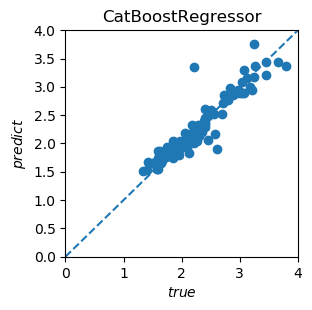

测试集相关系数: 0.9326
测试集均方根误差: 0.2402
平均绝对误差MAE 0.1807
拟合优度r2: 0.8457


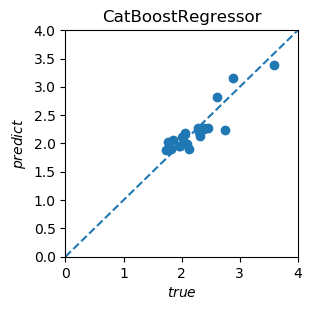

In [16]:
#zip,将里面的值逐一传递给外面
for name,model in zip(models_name,models):
    print('模型：',name)
    model = model   #建立模型
    model.fit(X_train,Y_train)
    
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    #对训练集的分析
    R_train = round(np.corrcoef(Y_train, Y_train_pred)[0][1],4)
    RMSE_train = round(np.sqrt(mean_squared_error(Y_train,Y_train_pred)),4)
    MAE_train = round(mean_absolute_error(Y_train,Y_train_pred),4)
    r2_train = round(r2_score(Y_train,Y_train_pred),4)
    print('训练集相关系数R:',R_train)
    print('训练集均方根误差RMSE:',RMSE_train)
    print('平均绝对误差MAE',MAE_train)
    print('拟合优度r2',r2_train)
    
    #绘制训练集的图表，观察其预测情况
    plt.figure(figsize=(3,3),dpi=100)
    plt.title(name)
    plt.scatter(Y_train,Y_train_pred)
    plt.xlabel(r'$true$')
    plt.ylabel(r'$predict$')
    plt.plot([0,4],[0,4],'--')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()
    
    #对测试分析
    R_test = round(np.corrcoef(Y_test, Y_test_pred)[0][1],4)
    RMSE_test = round(np.sqrt(mean_squared_error(Y_test, Y_test_pred)),4)
    MAE_test = round(mean_absolute_error(Y_test,Y_test_pred),4)
    r2_test = round(r2_score(Y_test,Y_test_pred),4)
    print('测试集相关系数:',R_test)
    print('测试集均方根误差:',RMSE_test)
    print('平均绝对误差MAE',MAE_test)
    print('拟合优度r2:',r2_test)
    
    
    #绘制测试集的图表，观察其预测情况
    plt.figure(figsize=(3,3),dpi=100)
    plt.title(name)
    plt.scatter(Y_test,Y_test_pred)
    plt.xlabel(r'$true$')
    plt.ylabel(r'$predict$')
    plt.plot([0,4],[0,4],'--')
    plt.xlim(0,4)
    plt.ylim(0,4)
    plt.show()